# **Data Import and Basic Processing**

In [31]:
!which pip

/Users/a1111/Library/Python/3.11/bin/pip


In [38]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from statsmodels.formula.api import glm
import seaborn as sns

In [13]:
data = pd.read_csv("US_Accidents_March23_every_10th.csv")
data.head()

/var/folders/lb/y74xy2x11ng8x378_nzpyvbw0000gn/T/ipykernel_8814/3287866670.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("US_Accidents_March23_every_10th.csv")


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-11,Source2,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-31,Source2,2,2016-02-08 16:16:08,2016-02-08 16:46:08,40.081459,-83.122398,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-41,Source2,2,2016-02-09 05:40:57,2016-02-09 06:10:57,39.447502,-84.191208,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Night,Night


In [14]:
drop_cols = ['Source', 'End_Lat','End_Lng', 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'
 'Traffic_Calming',
 'Traffic_Signal',
 'Airport_Code',
 'Turning_Loop',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Astronomical_Twilight',
 'Traffic_Calming',
 'Timezone',
 'Description'
 ]
data = data.drop(columns=drop_cols, errors='ignore')
data.head()

,ID,Severity,Start_Time,End_Time
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00
1,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42
2,A-21,2,2016-02-08 10:11:15,2016-02-08 10:41:15
3,A-31,2,2016-02-08 16:16:08,2016-02-08 16:46:08
4,A-41,2,2016-02-09 05:40:57,2016-02-09 06:10:57


I am going to create new columns to store specific information about start and end time, but first let's see if there are accidents with different start and end date.

In [15]:
# Convert Start_Time and End_Time to datetime with format='mixed'
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='mixed', errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='mixed', errors='coerce')

# Handle rows where parsing failed (optional)
if data[['Start_Time', 'End_Time']].isnull().any().any():
    print("Warning: Some dates could not be converted. Check your data for inconsistencies.")
    print("Number of problematic rows:")
    print(data[['Start_Time', 'End_Time']].isnull().sum())

# Calculate year, month, and day differences
year_diff = data['Start_Time'].dt.year != data['End_Time'].dt.year
month_diff = data['Start_Time'].dt.month != data['End_Time'].dt.month
day_diff = data['Start_Time'].dt.day != data['End_Time'].dt.day

# Count observations with differences
num_year_diff = year_diff.sum()
num_month_diff = month_diff.sum()
num_day_diff = day_diff.sum()

# Output results
print(f"Number of observations with different Start_Time and End_Time years: {num_year_diff}")
print(f"Number of observations with different Start_Time and End_Time months: {num_month_diff}")
print(f"Number of observations with different Start_Time and End_Time dates: {num_day_diff}")

Number of observations with different Start_Time and End_Time years: 427
Number of observations with different Start_Time and End_Time months: 836
Number of observations with different Start_Time and End_Time dates: 22343


So there is a lot of observations with different dates for the start and end of the accident, thus I will create separate columns for storing those information.

In [16]:
# Extract components for Start_Time
data['StartYear'] = data['Start_Time'].dt.year
data['StartMonth'] = data['Start_Time'].dt.month
data['StartDate'] = data['Start_Time'].dt.day
data['StartHour'] = data['Start_Time'].dt.hour
data['StartMinute'] = data['Start_Time'].dt.minute
data['StartSecond'] = data['Start_Time'].dt.second

# Extract components for End_Time
data['EndYear'] = data['End_Time'].dt.year
data['EndMonth'] = data['End_Time'].dt.month
data['EndDate'] = data['End_Time'].dt.day
data['EndHour'] = data['End_Time'].dt.hour
data['EndMinute'] = data['End_Time'].dt.minute
data['EndSecond'] = data['End_Time'].dt.second


# data = data.drop(columns=['Start_Time', 'End_Time'], errors='ignore')
data.head()
data.head()

,ID,Severity,Start_Time,End_Time,StartYear,StartMonth,StartDate,StartHour,StartMinute,StartSecond,EndYear,EndMonth,EndDate,EndHour,EndMinute,EndSecond
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,2016,2,8,5,46,0,2016,2,8,11,0,0
1,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42,2016,2,8,8,14,42,2016,2,8,8,44,42
2,A-21,2,2016-02-08 10:11:15,2016-02-08 10:41:15,2016,2,8,10,11,15,2016,2,8,10,41,15
3,A-31,2,2016-02-08 16:16:08,2016-02-08 16:46:08,2016,2,8,16,16,8,2016,2,8,16,46,8
4,A-41,2,2016-02-09 05:40:57,2016-02-09 06:10:57,2016,2,9,5,40,57,2016,2,9,6,10,57


# **1. Frequency Analysis**
## **1.1 Frequency by Month Over Time**

In [17]:
# combine start year and month
data['StartYearMonth'] = data['Start_Time'].dt.to_period('M')
monthly_accidents = data.groupby('StartYearMonth').size()
monthly_accidents.head()

StartYearMonth
2016-01       2
2016-02      99
2016-03     630
2016-04    1810
2016-05    1760
Freq: M, dtype: int64

We exclude the first and last month in the dataset since they could be incomplete. 

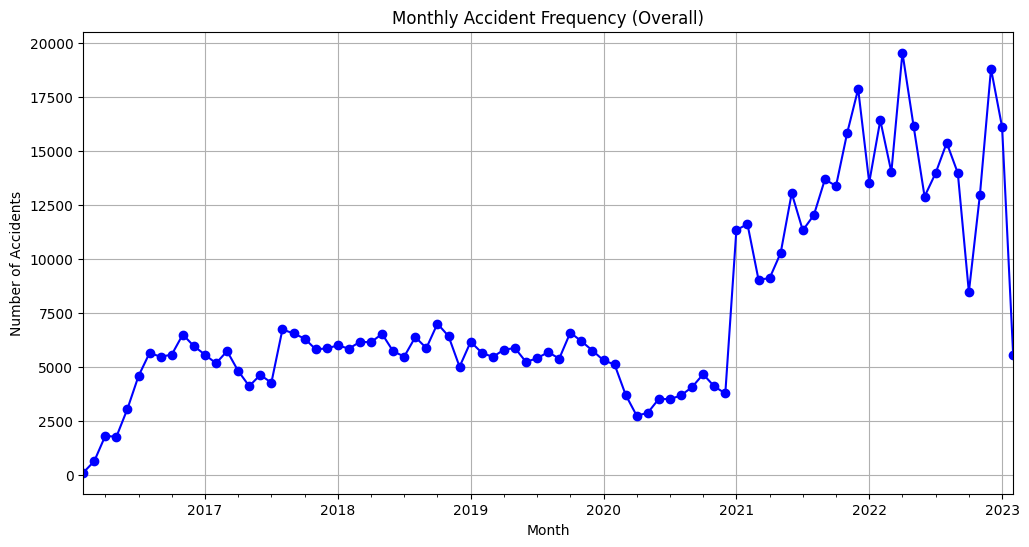

In [27]:
monthly_accidents = monthly_accidents[1:-1]
plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='line', marker='o', color='b', title='Monthly Accident Frequency (Overall)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

## TODO: interpret

Now let's see the trend grouped by severity

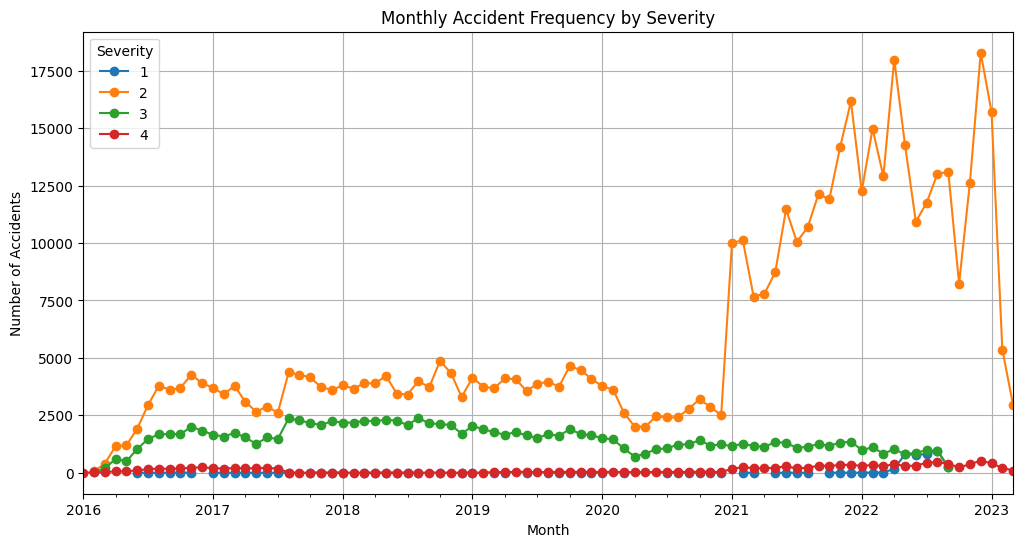

In [ ]:
# group by severity and plot trend
severity_monthly = data.groupby(['StartYearMonth', 'Severity']).size().unstack()
severity_monthly.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Monthly Accident Frequency by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid()
plt.legend(title='Severity')
plt.show()

## TODO: interpret

## **1.2 Frequency by Time of the day**

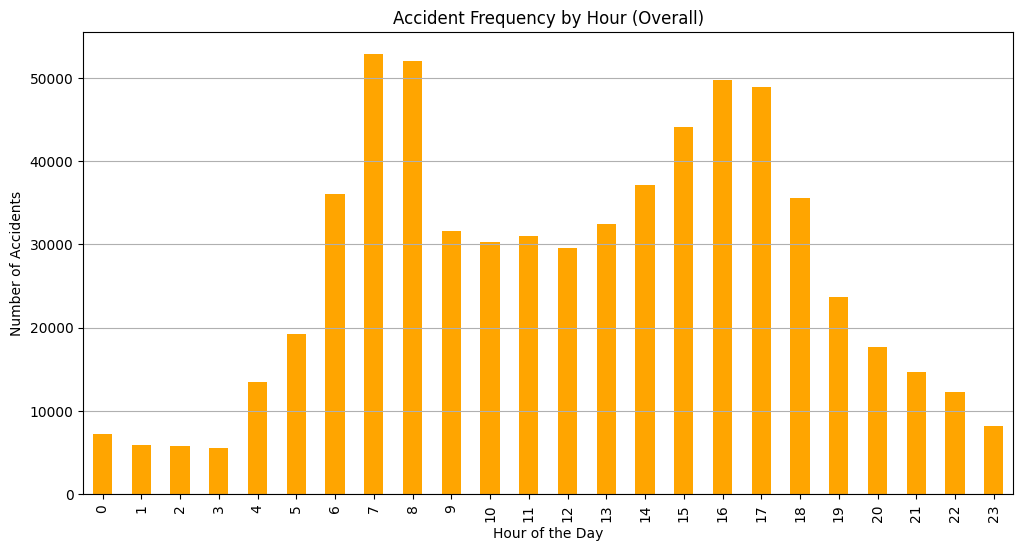

In [29]:
hourly_accidents = data.groupby('StartHour').size()
plt.figure(figsize=(12, 6))
hourly_accidents.plot(kind='bar', color='orange', title='Accident Frequency by Hour (Overall)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

## TODO: interpret

Also grouped by severity:

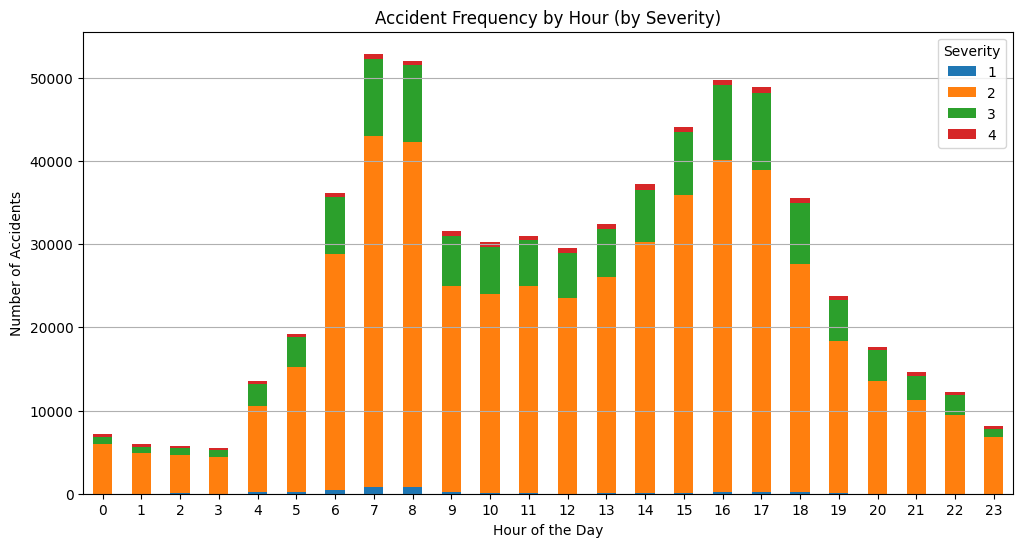

In [30]:
severity_hourly = data.groupby(['StartHour', 'Severity']).size().unstack()
severity_hourly.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Accident Frequency by Hour (by Severity)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.legend(title='Severity')
plt.xticks(range(0, 24), rotation=0)
plt.show()

# **2.Duration vs Severity**

First create a new column to store duration

## **2.1 Simple Correlation Analysis**

In [32]:
data['Duration_Minutes'] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 60

# Remove negative or invalid durations
data = data[data['Duration_Minutes'] > 0]
print(data[['Duration_Minutes', 'Severity']].describe())

       Duration_Minutes       Severity
count      6.449140e+05  644914.000000
mean       3.921581e+02       2.212631
std        1.294519e+04       0.464658
min        3.000000e+00       1.000000
25%        3.000000e+01       2.000000
50%        6.808333e+01       2.000000
75%        1.204000e+02       2.000000
max        2.812939e+06       4.000000


In [ ]:
# Spearman correlation (non-parametric)
spearman_corr, spearman_p = spearmanr(data['Duration_Minutes'], data['Severity'])
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4e}")

# Pearson correlation (parametric)
pearson_corr, pearson_p = pearsonr(data['Duration_Minutes'], data['Severity'])
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4e}")

Spearman Correlation: -0.1830, p-value: 0.0000e+00
Pearson Correlation: -0.0000, p-value: 9.7717e-01


Seems like there is no correlation between duration and severity based on these results. 

## **2.2 Generalized Linear Model**

In [39]:
# Fit GLM
glm_model = glm("Severity ~ Duration_Minutes", data=data, family=sm.families.Poisson()).fit()
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Severity   No. Observations:               644914
Model:                            GLM   Df Residuals:                   644912
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.9633e+05
Date:                Tue, 03 Dec 2024   Deviance:                       57331.
Time:                        13:33:03   Pearson chi2:                 6.29e+04
No. Iterations:                     4   Pseudo R-squ. (CS):          1.240e-10
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7942      0.001  

Again the p-value for slope of `Duration_Minutes` is *0.993*, indicating that it's insignificant. In addition the `Pseudo R squared` is *1.240e-10*, which is extremely low, indicating the model explains almost none of the variance in severity. Therefore, we can conclude that the `accident duration` does not significantly predict `severity`.

# **3. Time Series Analysis**

In this final section I am going to establish an ARIMA model for forecasting accident trends. 

## **3.1 Data preparation**

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
fulldata = pd.read_csv("US_Accidents_March23_every_10th.csv")

# Drop unnecessary columns
drop_cols = [
    'ID', 'Source', 'Description', 'Street', 'End_Time', 'Start_Lat', 'Start_Lng',
    'End_Lat', 'End_Lng', 'Zipcode', 'Weather_Timestamp', 'Country', 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'
]
fulldata = fulldata.drop(columns=drop_cols)

# Convert time columns to datetime
fulldata['Start_Time'] = pd.to_datetime(fulldata['Start_Time'], format='mixed', errors='coerce')

# Check for rows where parsing failed and drop them
print("Number of NaT (not converted):", fulldata['Start_Time'].isna().sum())
fulldata = fulldata.dropna(subset=['Start_Time'])

# Encode categorical variables
categorical_cols = ['City', 'County', 'State', 'Timezone', 'Airport_Code', 
                    'Wind_Direction', 'Weather_Condition']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    fulldata[col] = label_encoders[col].fit_transform(fulldata[col].astype(str))

# Fill missing values for numeric columns
fulldata.fillna(fulldata.median(), inplace=True)

# Check the cleaned data
print(fulldata.info())

Number of NaT (not converted): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644914 entries, 0 to 644913
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           644914 non-null  int64         
 1   Start_Time         644914 non-null  datetime64[ns]
 2   Distance(mi)       644914 non-null  float64       
 3   City               644914 non-null  int64         
 4   County             644914 non-null  int64         
 5   State              644914 non-null  int64         
 6   Timezone           644914 non-null  int64         
 7   Airport_Code       644914 non-null  int64         
 8   Temperature(F)     644914 non-null  float64       
 9   Wind_Chill(F)      644914 non-null  float64       
 10  Humidity(%)        644914 non-null  float64       
 11  Pressure(in)       644914 non-null  float64       
 12  Visibility(mi)     644914 non-null  float64       
 13  Wind_Direct

## **3.2 Feature selection**

In [66]:
from sklearn.feature_selection import mutual_info_regression

# Define target and features
target = 'Severity'  # Target variable
X = fulldata.drop(columns=['Severity', 'Start_Time'])  # Exclude target and datetime column

# Ensure only numeric columns are included in X
X = X.select_dtypes(include=['number'])  # Select only numeric columns
y = fulldata[target]

# Check X and y for consistency
print("Features included in X:", X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Display sorted mutual information scores
print("Mutual Information Scores:")
print(mi_scores_df)

Features included in X: ['Distance(mi)', 'City', 'County', 'State', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']
Shape of X: (644914, 15)
Shape of y: (644914,)
Mutual Information Scores:
              Feature  Mutual_Info_Score
0        Distance(mi)           0.122009
1                City           0.088363
5        Airport_Code           0.074499
2              County           0.067303
7       Wind_Chill(F)           0.028526
12    Wind_Speed(mph)           0.027144
3               State           0.026332
14  Weather_Condition           0.025904
6      Temperature(F)           0.016246
11     Wind_Direction           0.016202
9        Pressure(in)           0.010474
10     Visibility(mi)           0.003359
4            Timezone           0.001403
8         Humidity(%)           0.001040
13  Precipitation(in)           0.000000


From mutual information outcome above, I decide to move on with features below:

[`'Distance(mi)', 'City', 'Airport_Code', 'County', 'Wind_Chill(F)', 
                     'Wind_Speed(mph)', 'State', 'Weather_Condition'`]

In [ ]:
selected_features = ['Distance(mi)', 'City', 'Airport_Code', 'County', 'Wind_Chill(F)', 
                     'Wind_Speed(mph)', 'State', 'Weather_Condition']
X = fulldata[selected_features + ['Start_Time']]
y = fulldata['Severity']

# Train-validation-test split (60-20-20)
train_size = int(len(X) * 0.6)
valid_size = int(len(X) * 0.2)

X_train, X_valid, X_test = X[:train_size], X[train_size:train_size+valid_size], X[train_size+valid_size:]
y_train, y_valid, y_test = y[:train_size], y[train_size:train_size+valid_size], y[train_size+valid_size:]

In [69]:
# Ensure 'Start_Time' is included for resampling
train_agg = X_train.copy()
train_agg['Severity'] = y_train

valid_agg = X_valid.copy()
valid_agg['Severity'] = y_valid

# Resample based on 'Start_Time'
train_agg.set_index('Start_Time', inplace=True)
valid_agg.set_index('Start_Time', inplace=True)

# Resample to monthly aggregation
train_agg = train_agg.resample('M').mean()
valid_agg = valid_agg.resample('M').mean()

## **3.3 Model Fitting**

In [70]:
# Define and fit ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

order = (1, 1, 1) 
model = SARIMAX(train_agg['Severity'], exog=train_agg[selected_features], order=order)
arima_results = model.fit()

# Print model summary
print(arima_results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06795D+00    |proj g|=  2.61186D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      1     21      1     0     0   2.612D+03  -2.068D+00
  F =  -2.0679482172370069     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:               Severity   No. Observations:                   87
Model:               SARIMAX(1, 1, 1

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


## **3.4 Model Validation**

In [79]:
valid_agg['Severity'].fillna(valid_agg['Severity'].mean(), inplace=True)
valid_agg[selected_features] = valid_agg[selected_features].fillna(valid_agg[selected_features].mean())
# Validation predictions
validation_pred = arima_results.get_forecast(steps=len(valid_agg), exog=valid_agg[selected_features])
validation_pred_values = validation_pred.predicted_mean

# Evaluate on validation set
mae = mean_absolute_error(valid_agg['Severity'], validation_pred_values)
rmse = np.sqrt(mean_squared_error(valid_agg['Severity'], validation_pred_values))

print(f"Validation MAE: {mae}")
print(f"Validation RMSE: {rmse}")

Validation MAE: 0.13483458143051413
Validation RMSE: 0.3321419227199855


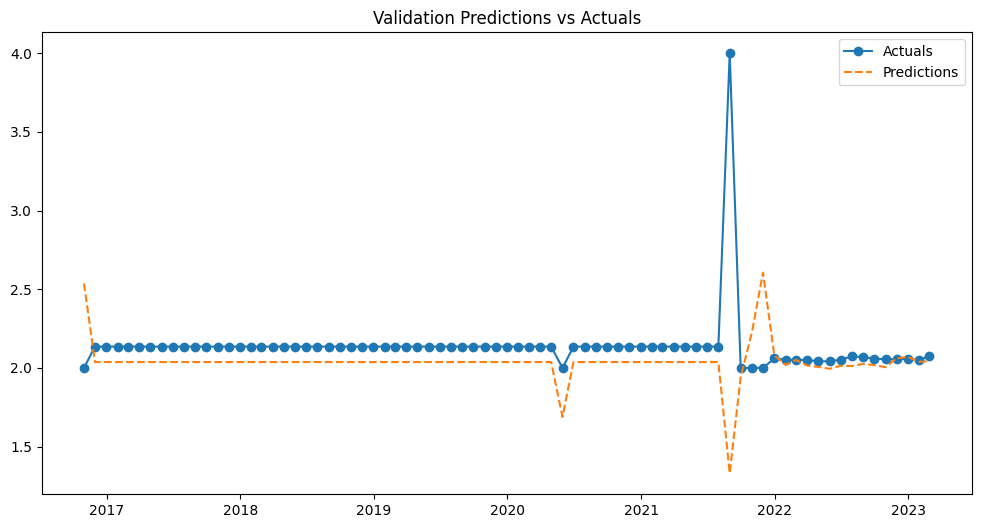

In [80]:
# Plot predictions vs actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(valid_agg.index, valid_agg['Severity'], label="Actuals", marker='o')
plt.plot(valid_agg.index, validation_pred_values, label="Predictions", linestyle='--')
plt.legend()
plt.title("Validation Predictions vs Actuals")
plt.show()

## **3.5 Model Evaluation**

In [82]:
# Resample the test dataset for aggregation
test_agg = X_test.copy()
test_agg['Severity'] = y_test
test_agg.set_index('Start_Time', inplace=True)
test_agg = test_agg.resample('M').mean()
test_agg['Severity'].fillna(test_agg['Severity'].mean(), inplace=True)
test_agg[selected_features] = test_agg[selected_features].fillna(test_agg[selected_features].mean())

# Make predictions on the test set
test_pred = arima_results.get_forecast(steps=len(test_agg), exog=test_agg[selected_features])
test_pred_values = test_pred.predicted_mean

# Evaluate on the test set
test_mae = mean_absolute_error(test_agg['Severity'], test_pred_values)
test_rmse = np.sqrt(mean_squared_error(test_agg['Severity'], test_pred_values))

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")

Test MAE: 0.10514769904363311
Test RMSE: 0.20770397557708212


The MAE and RMSE is even lower than that of validation, thus our model is not overfitting at all. 

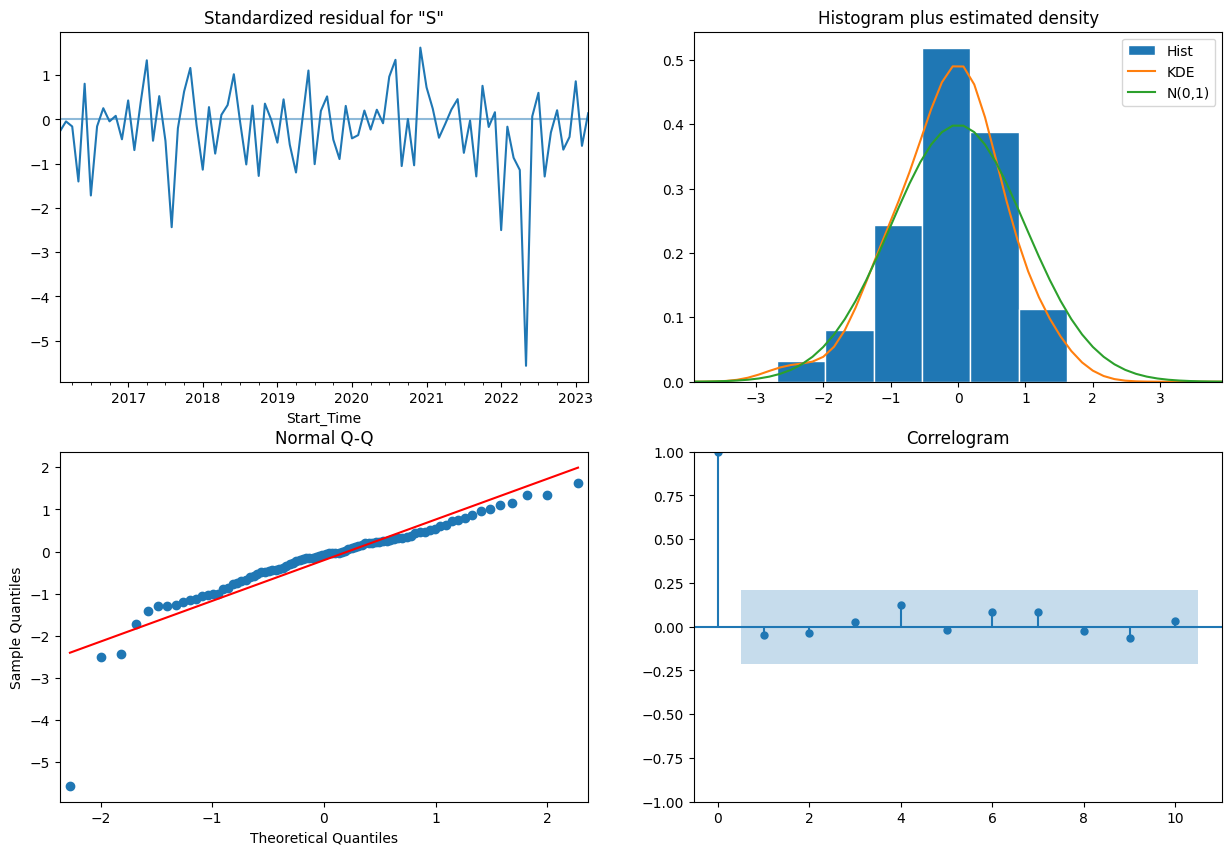

In [83]:
arima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

From the above diagnostic plots I see that:
1.	Standardized Residual Plot: Residuals fluctuate around zero, but there is some evidence of spikes, suggesting potential outliers or non-stationarity.
2.	Histogram plus Estimated Density: Residuals are approximately normally distributed, though slight deviations from the normal curve are visible.
3.	Normal Q-Q Plot: Residuals generally align with the diagonal line, indicating normality, but deviations in the tails suggest minor non-normality.
4.	Correlogram: Residual autocorrelations fall mostly within the confidence intervals, implying minimal remaining temporal correlation, though a few small spikes may warrant further attention.

In general, the model assumptions are valid. 